<a href="https://colab.research.google.com/github/RavelPaniagua/IA-con-Python/blob/main/Red_Reuronal_de_Clasificaci%C3%B3n_con_capas_densas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadados = tfds.load("mnist",as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.137QMR_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.137QMR_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadados

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [3]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

nombres_clases = metadados.features["label"].names

In [4]:
#Normalizacion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes,tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


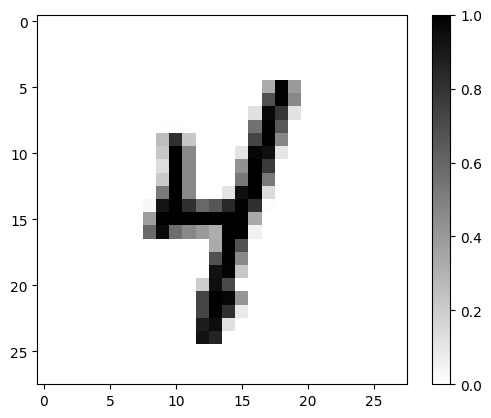

In [5]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt
#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen,cmap = plt.cm.binary)
plt.colorbar()
plt.show()

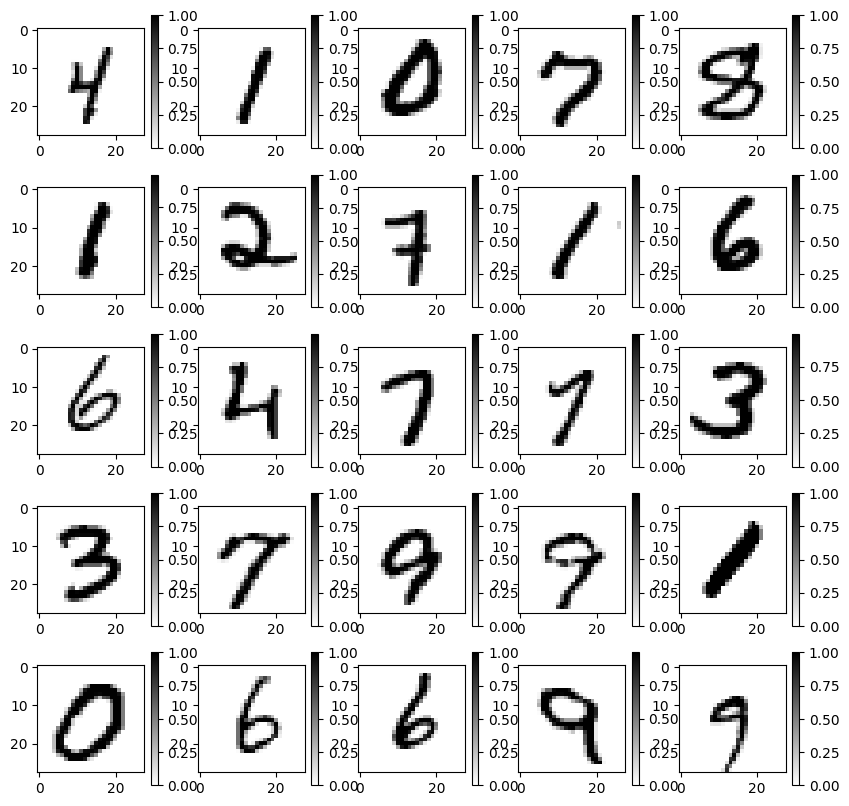

In [6]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  plt.subplot(5,5, i+1)
  plt.imshow(imagen,cmap = plt.cm.binary)
  plt.colorbar()

plt.show()





In [27]:
modelo = tf.keras.Sequential([
  #capa de entrada
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  # neurona o Capa oculta
  tf.keras.layers.Dense(50, activation=tf.nn.relu), # Agregando otra capa con 50 neuronas cada una para mejorar el entrenamiento
  # para lograr un mejor ajuste no necesitamos que sea forzosamente lineal y mejor aregarle una funcion de activacion
  # a nuestras neuronas (relu) es el que para numeros negativos da 0 y para positivos el mismo numero
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  #Capa de Salida
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)

  ])



Nota importante a la hora de trabajar con clasificación de imagenes no es recomendable utilizar capas Densas porque esta es buena cuando se trabaja con datos en tablas pero no es buena para las imagenes. Porque esta se basa en buscar solo en lugares especificos y no como en este caso que son pixeles y estos pueden estar en cualquier lugar.

In [28]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [29]:
#COMO SON 60,000 DATOS ES BUENO SEPARARLOS POR LOTE PARA ASI NO CARGAR EL PROCESAMIENTO
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [30]:
import math
entrenamiento = modelo.fit(
    datos_entrenamiento,epochs=10,steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, None, None, 28, 28, 1), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, None, None, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, None, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None